In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
df = pd.read_csv("/content/car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [8]:
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [9]:
print(df.Fuel_Type.value_counts().sort_index())

CNG         2
Diesel     60
Petrol    239
Name: Fuel_Type, dtype: int64


In [10]:
print(df.Selling_type.value_counts().sort_index())

Dealer        195
Individual    106
Name: Selling_type, dtype: int64


In [11]:
print(df.Transmission.value_counts().sort_index())

Automatic     40
Manual       261
Name: Transmission, dtype: int64


In [12]:
print(df.Year.value_counts().sort_index())

2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: Year, dtype: int64


In [13]:
print(df.Car_Name.value_counts().sort_index())

800                   1
Activa 3g             2
Activa 4g             1
Bajaj  ct 100         1
Bajaj Avenger 150     1
                     ..
sx4                   6
verna                14
vitara brezza         1
wagon r               4
xcent                 3
Name: Car_Name, Length: 98, dtype: int64


In [14]:
df.replace({'Fuel_Type':{'CNG':0,'Diesel':1,'Petrol':2}},inplace=True)
df.replace({'Selling_type':{'Individual':0,'Dealer':1}},inplace=True)
df.replace({'Transmission':{'Automatic':0,'Manual':1}},inplace=True)

In [15]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
rf_model = RandomForestRegressor(random_state=42)

In [18]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = rf_model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared 값을 계산
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.8547236608196712
R-squared: 0.9628955080316364


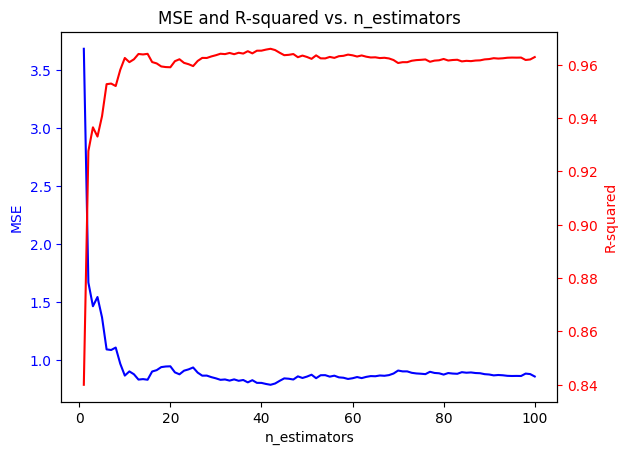

Minimum MSE: 0.7831374986059993, Corresponding n_estimators: 42
Maximum R-squared: 0.9660031418818049, Corresponding n_estimators: 42


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_test, y_train, y_test defined previously

# Lists to store MSE and R-squared values
mse_values = []
r2_values = []

# Variables to store the best n_estimators for minimum MSE and maximum R-squared
min_mse = np.inf
max_r2 = -np.inf
min_mse_n_estimators = None
max_r2_n_estimators = None

# Iterate through n_estimators from 1 to 100
for n_estimators in range(1, 101):
    # Create and train a Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

    # Update variables for the best n_estimators based on minimum MSE
    if mse < min_mse:
        min_mse = mse
        min_mse_n_estimators = n_estimators

    # Update variables for the best n_estimators based on maximum R-squared
    if r2 > max_r2:
        max_r2 = r2
        max_r2_n_estimators = n_estimators

# Plotting MSE and R-squared values against n_estimators
fig, ax1 = plt.subplots()

ax1.plot(range(1, 101), mse_values, 'b-')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(1, 101), r2_values, 'r-')
ax2.set_ylabel('R-squared', color='r')
ax2.tick_params('y', colors='r')

plt.title('MSE and R-squared vs. n_estimators')
plt.show()

# Display the best n_estimators for minimum MSE and maximum R-squared
print(f"Minimum MSE: {min_mse}, Corresponding n_estimators: {min_mse_n_estimators}")
print(f"Maximum R-squared: {max_r2}, Corresponding n_estimators: {max_r2_n_estimators}")


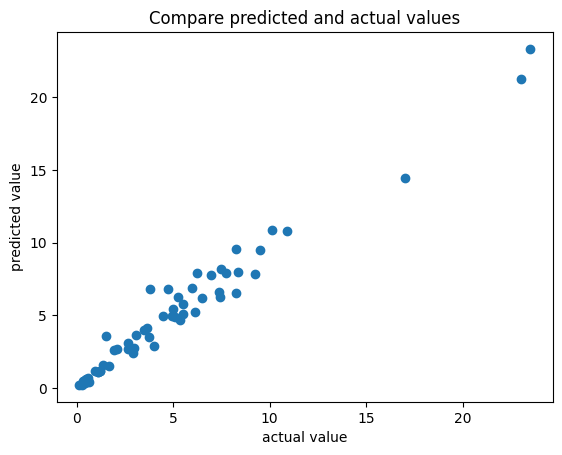

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=42,random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Compare predicted and actual values')
plt.show()

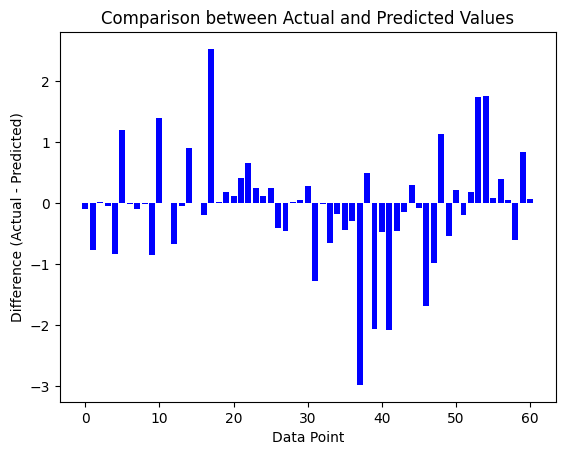

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test defined previously

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest model
rf_model = RandomForestRegressor(n_estimators=42, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Calculating the differences between actual and predicted values
differences = y_test - y_pred

# Creating a bar chart
plt.bar(np.arange(len(differences)), differences, color='blue')
plt.xlabel('Data Point')
plt.ylabel('Difference (Actual - Predicted)')
plt.title('Comparison between Actual and Predicted Values')
plt.show()
